# import

In [189]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

## customers_df (olist_customers_dataset.csv)

In [190]:
customers_df = pd.read_csv("./data/olist_customers_dataset.csv")
print(customers_df.shape)
customers_df.head(10)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


### 지역별 고객 수 시각화

In [191]:
# round(customers_df['customer_state'].value_counts(normalize=True).reset_index(),2)[:10]

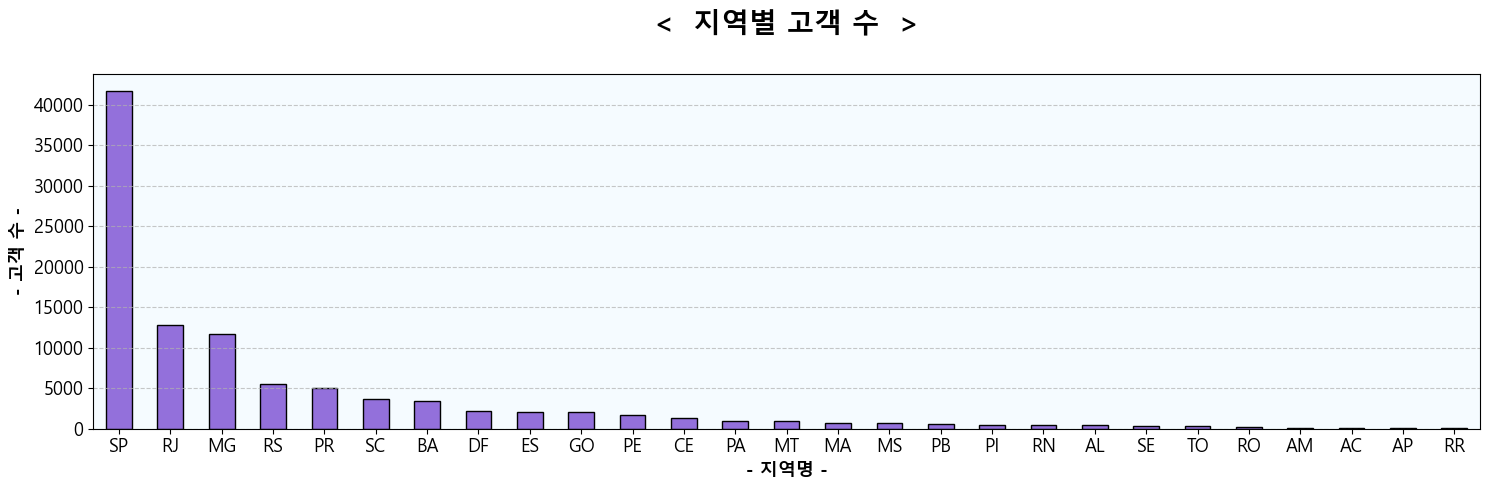

In [192]:
fig, ax = plt.subplots(figsize=(15,5))

_ = customers_df['customer_state'].value_counts().plot.bar(color="mediumpurple", edgecolor="black")

_= plt.title('<  지역별 고객 수  >\n', fontsize=20, fontweight="bold")
_= plt.xlabel('- 지역명 -', fontweight='bold', fontsize=13)
_= plt.ylabel('- 고객 수 -', fontweight='bold', fontsize=13)
_= plt.xticks(rotation=0, fontsize=13)
_= plt.yticks(fontsize=13)
_= plt.tight_layout()
_= ax.set_facecolor('#F5FBFF') 
_= plt.grid(axis="y", linestyle="--", alpha=0.7)

In [193]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## orders_df (olist_orders_dataset.csv)

In [194]:
orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
print(orders_df.shape)
orders_df.head(10)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [195]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [196]:
# orders_df['order_id'].value_counts()

In [197]:
# reviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
# print(reviews_df.shape)
# reviews_df.head(3)

In [198]:
# round(reviews_df['review_score'].value_counts(normalize=True).sort_index().reset_index(), 2)

In [199]:
# sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
# print(sellers_df.shape)
# sellers_df.head()

## items_df (olist_order_items_dataset.csv)

In [200]:
items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
print(items_df.shape)
items_df.head(5)

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [201]:
items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### 상품 가격대 분포 시각화

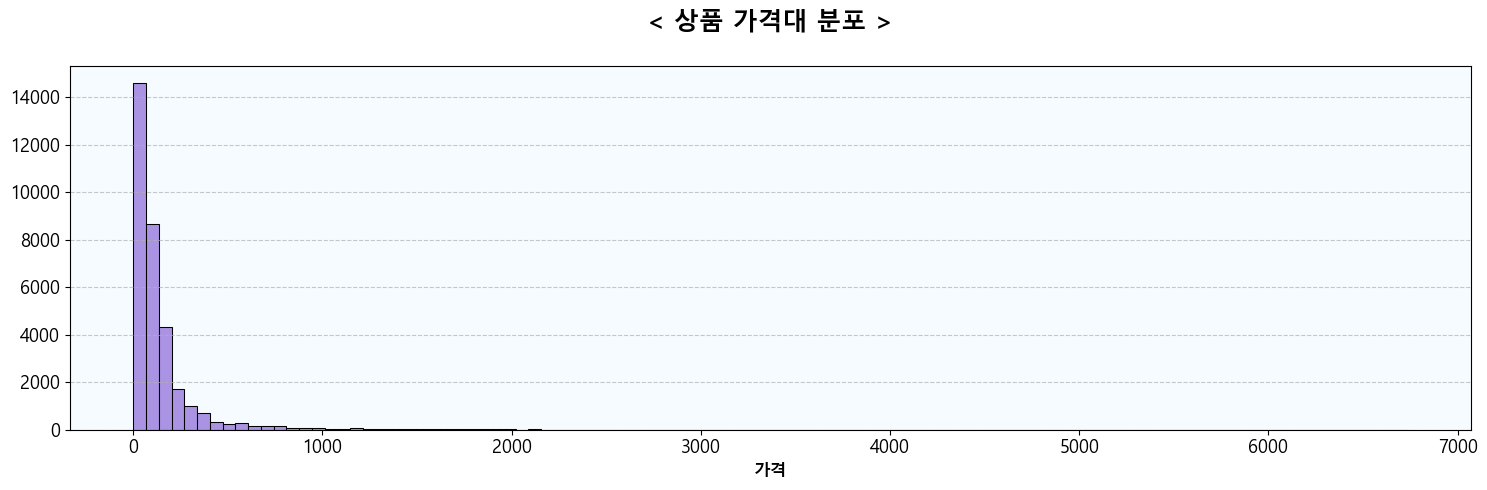

In [202]:
fig, ax = plt.subplots(figsize=(15,5))
dfdf = items_df.groupby(['product_id'])['price'].mean().reset_index()
_=sns.histplot(dfdf, x='price', bins=100, color="mediumpurple", edgecolor="black")

_= plt.title('< 상품 가격대 분포 >\n', fontsize=18, fontweight="bold")
_= plt.xlabel('가격', fontweight='bold', fontsize=12)
_= plt.ylabel('', fontweight='bold')
_= plt.xticks(rotation=0, fontsize=13)
_= plt.yticks(fontsize=13)
_= plt.tight_layout()
_= plt.grid(axis="y", linestyle="--", alpha=0.7)
_= ax.set_facecolor('#F5FBFF') 

## products_df (olist_products_dataset.csv)

In [203]:
products_df = pd.read_csv('./data/olist_products_dataset.csv')
print(products_df.shape)
products_df.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [204]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [205]:
products_df.dropna(inplace=True)

In [206]:
products_df.loc[products_df['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


### 상품 종류

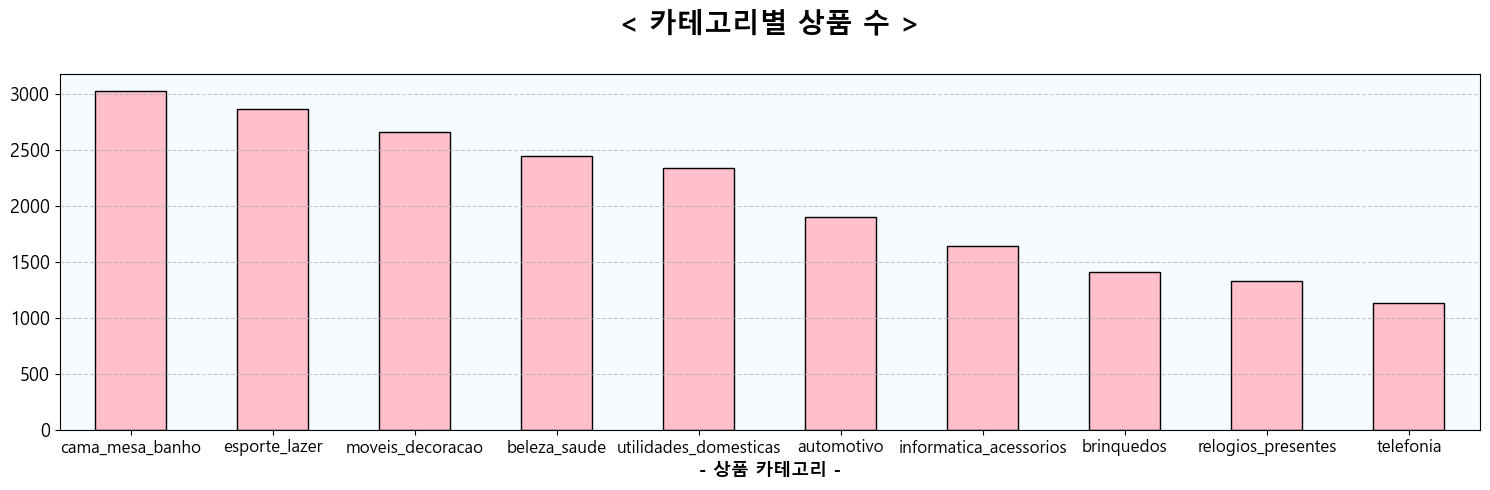

In [207]:
fig, ax = plt.subplots(figsize=(15,5))

_ = products_df['product_category_name'].value_counts()[:10].plot.bar(color="pink", edgecolor="black")
_= plt.title('< 카테고리별 상품 수 >\n', fontsize=20, fontweight="bold")
_= plt.xlabel('- 상품 카테고리 -', fontweight='bold', fontsize=13)
_= plt.xticks(rotation=0, fontsize=12)
_= plt.yticks(fontsize=13)
_= plt.tight_layout()
_= plt.grid(axis="y", linestyle="--", alpha=0.7)
_= ax.set_facecolor('#F5FBFF')

## payments_df (olist_order_payments_dataset.csv)

In [208]:
payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
print(payments_df.shape)
payments_df.head(3)

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [209]:
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### 할부개월수 boxplot

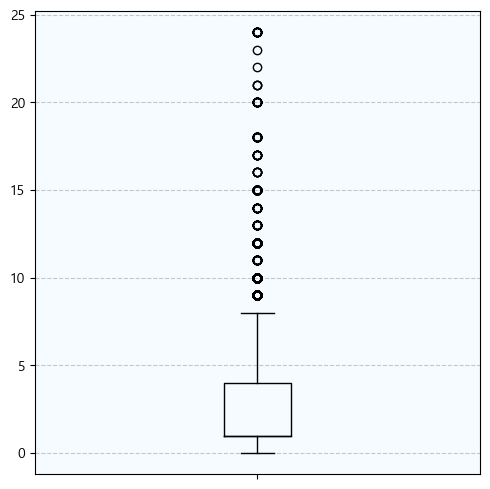

In [210]:
fig, ax = plt.subplots(figsize=(5,5))
_=payments_df['payment_installments'].plot.box(color='black')

_= plt.xlabel('')
_= plt.ylabel('', fontweight='bold', fontsize=15)
_= plt.xticks(rotation=0, fontsize=10)
_= plt.yticks(fontsize=10)
_=ax.set_xticklabels([])
_= plt.tight_layout()
_= plt.grid(axis="y", linestyle="--", alpha=0.7)
_= ax.set_facecolor('#F5FBFF')

In [211]:
# payments_df.dtypes

In [212]:
payments_df[['payment_value']].describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


### pv_df

- 주문별 지불 총액 계산

In [213]:
pv_df = payments_df.groupby('order_id')['payment_value'].sum().reset_index()
print(pv_df.shape)
pv_df.head()

(99440, 2)


,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


## geo_df

In [214]:
geo_df = pd.read_csv('./data/olist_geolocation_dataset.csv')
print(geo_df.shape)
geo_df.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## gdp_df (Cities_Brazil_IBGE.xlsx)

In [215]:
gdp_df = pd.read_excel('./data/Cities_Brazil_IBGE.xlsx')
gdp_df['Pib_2014'] = gdp_df['Pib_2014'].str.replace(",",".")
gdp_df['Pib_2014'] = gdp_df['Pib_2014'].astype('float')
gdp_df.rename(columns = {
    'LocalUF':'customer_state'
}, inplace=True)

print(gdp_df.shape)
gdp_df.head(3)

(5570, 14)


,IBGECode,LocalCidade,customer_state,LocalEstado,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,1100015,ALTA FLORESTA D'OESTE,RO,Rondonia,N,-119283,-619953,alta-florense,23167,24392,"0,641",53490,47577,16461.11
1,1100023,ARIQUEMES,RO,Rondonia,N,-990571,-630325,ariquemense,106168,90353,"0,702",0,0,19401.43
2,1100031,CABIXI,RO,Rondonia,N,-134945,-60552,cabixiense,5438,6313,"0,65",22635,19354,18346.17


In [216]:
gdp_df.isnull().sum()

IBGECode                    0
LocalCidade                 0
customer_state              0
LocalEstado                 0
RegiaoBrasil                0
Latitude                    0
Longitude                   0
Gentilico                   0
PopEstimada_2018            0
PopCenso 2010               0
IDHM                        6
ReceitasRealizadas_2014     0
DespesasEmpenhadas_2014     0
Pib_2014                   54
dtype: int64

### state_gdp_df

- 지역별 GDP 계산

In [217]:
state_gdp_df = gdp_df.groupby(['customer_state'])['Pib_2014'].mean().sort_values(ascending=False).reset_index()

quantiles = state_gdp_df['Pib_2014'].quantile([0.2, 0.4, 0.6, 0.8])

def classify_income(pib):
    if pib <= quantiles[0.2]:
        return "Level1"
    elif pib <= quantiles[0.4]:
        return "Level2"
    elif pib <= quantiles[0.6]:
        return "Level3"
    elif pib <= quantiles[0.8]:
        return 'Level4'
    else:
        return "Level5"

state_gdp_df['Level'] = state_gdp_df['Pib_2014'].apply(classify_income)
# state_gdp_df = state_gdp_df.loc[state_gdp_df['customer_state']!='SP']
level_order = ["Level1", "Level2", "Level3", "Level4", "Level5"]
state_gdp_df['Level'] = pd.Categorical(state_gdp_df["Level"], categories=level_order, ordered=True)

print(state_gdp_df.shape)
state_gdp_df.head()

(27, 3)


,customer_state,Pib_2014,Level
0,DF,73971.050000,Level5
1,MS,32473.453544,Level5
2,RJ,32077.397222,Level5
3,MT,31219.389640,Level5
4,RS,30904.979898,Level5


#### 지역별 GDP 시각화

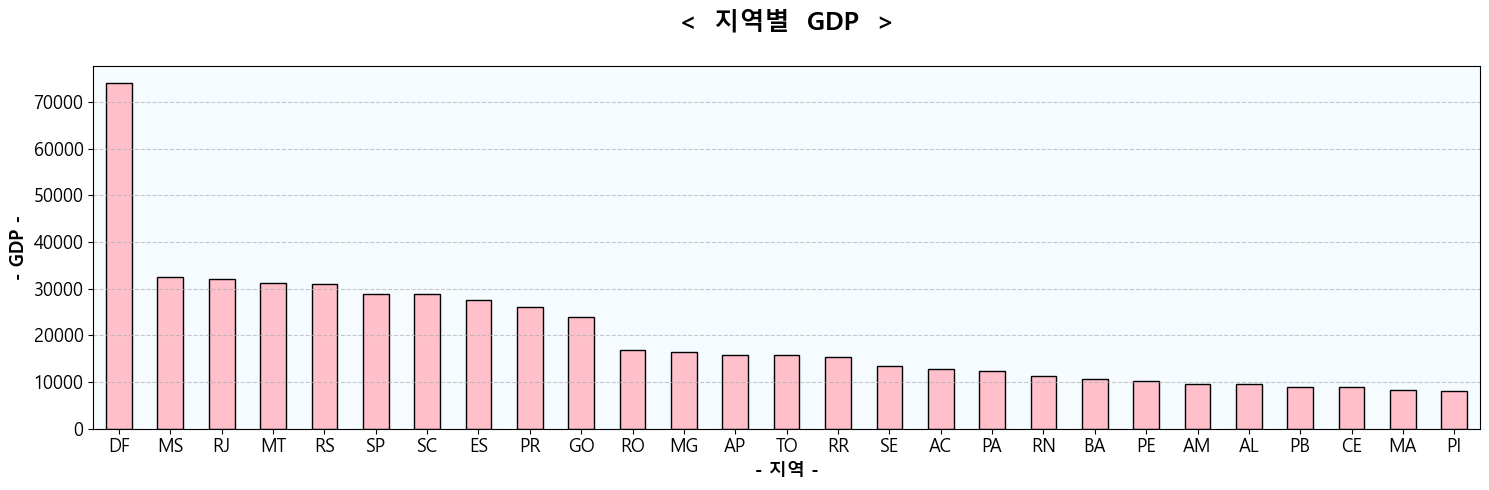

In [218]:
fig, ax = plt.subplots(figsize=(15,5))

_=state_gdp_df.plot.bar(
    x='customer_state', y='Pib_2014', 
    color="pink", edgecolor="black",
    ax=ax)

_= plt.title('<  지역별  GDP  >\n', fontsize=18, fontweight="bold")
_= plt.xlabel('- 지역 -', fontsize=13,fontweight='bold')
_= plt.ylabel('- GDP -', fontsize=13, fontweight='bold')
_= plt.xticks(rotation=0, fontsize=13)
_= plt.yticks(fontsize=13)
_= plt.tight_layout()
_= plt.grid(axis="y", linestyle="--", alpha=0.7)
_= ax.legend().remove()
_= ax.set_facecolor('#F5FBFF')

# 분석

## 지역별 구매 카테고리

### items_df + products_df

In [219]:
df1 = pd.merge(items_df, products_df[['product_id', 'product_category_name']])
print(df1.shape)
df1.head()

(111046, 8)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff


### cate_price_df

- 제품 카테고리별 평균 금액

In [220]:
cate_price_df = df1.groupby('product_category_name')['price'].mean().sort_values(ascending=False).reset_index()
print(cate_price_df.shape)
cate_price_df.head()

(73, 2)


,product_category_name,price
0,pcs,1098.340542
1,portateis_casa_forno_e_cafe,624.285658
2,eletrodomesticos_2,476.124958
3,agro_industria_e_comercio,342.124858
4,instrumentos_musicais,281.616000


- 제품 카테고리별 가격 기준으로 등급 책정 (H, L)

In [221]:
q1 = cate_price_df['price'].quantile(0.5)
q2 = cate_price_df['price'].quantile(0.5) 

# price 기준으로 H, M, L 분류
def classify_price(price):
    if price <= q1:
        return 'L'
#     elif price <= q2:
#         return 'M'
    else:
        return 'H'

cate_price_df['price_category'] = cate_price_df['price'].apply(classify_price)
cate_price_df = cate_price_df[['product_category_name', 'price_category']]
print(cate_price_df.shape)
cate_price_df.head()

(73, 2)


,product_category_name,price_category
0,pcs,H
1,portateis_casa_forno_e_cafe,H
2,eletrodomesticos_2,H
3,agro_industria_e_comercio,H
4,instrumentos_musicais,H


### merge_df

- items_df + products_df + cate_price_df + orders_df + customers_df + state_gdp_df

In [222]:
df3 = pd.merge(df1, cate_price_df)
df4 = pd.merge(orders_df, df3)
df5 = pd.merge(df4, customers_df)
merge_df = pd.merge(df5, state_gdp_df[['customer_state', 'Level']])
print(merge_df.shape)
merge_df.head(3)

(111046, 21)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,shipping_limit_date,price,freight_value,product_category_name,price_category,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Level
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,L,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Level5
1,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-19 20:31:37,19.90,8.72,papelaria,L,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Level5
2,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,1,9a78fb9862b10749a117f7fc3c31f051,...,2017-08-11 12:05:32,149.99,19.77,moveis_escritorio,H,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,Level5


In [223]:
# merge_df['order_id'].value_counts()

#### 지역별 구매 카테고리 비율

In [224]:
dfdf = merge_df[['customer_state', 'price_category','Level']].value_counts().reset_index()
dfdf['total_count'] = dfdf.groupby('customer_state')['count'].transform('sum')

dfdf['category_ratio'] = dfdf['count'] / dfdf['total_count']
dfdf['category_ratio'] = round(dfdf['category_ratio'], 2)

dfdf[['customer_state', 'Level', 'price_category', 'category_ratio']].sort_values(by='customer_state').reset_index(drop=True)[:6]

,customer_state,Level,price_category,category_ratio
0,AC,Level2,H,0.46
1,AC,Level2,L,0.54
2,AL,Level1,L,0.42
3,AL,Level1,H,0.58
4,AM,Level1,H,0.56
5,AM,Level1,L,0.44


In [247]:
# pivot_data = dfdf.pivot(index="Level", columns="price_category", values="category_ratio")

# # 누적막대그래프
# fig, ax = plt.subplots(figsize=(10, 6))

# # X축 위치
# x = range(len(pivot_data))

# # 각 카테고리 값 쌓기
# bottom = None
# for category in pivot_data.columns:
#     ax.bar(x, pivot_data[category], bottom=bottom, label=category, width=0.6)
#     if bottom is None:
#         bottom = pivot_data[category]
#     else:
#         bottom += pivot_data[category]

# # X축 설정
# ax.set_xticks(x)
# ax.set_xticklabels(pivot_data.index, fontsize=12)
# ax.set_xlabel("Level", fontsize=14, fontweight="bold")
# ax.set_ylabel("Category Ratio", fontsize=14, fontweight="bold")

# # 제목 및 스타일
# ax.set_title("< GDP 등급별 카테고리 비율 >", fontsize=16, fontweight="bold")
# ax.legend(title="Price Category", fontsize=12, title_fontsize=14)
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()

# plt.show()

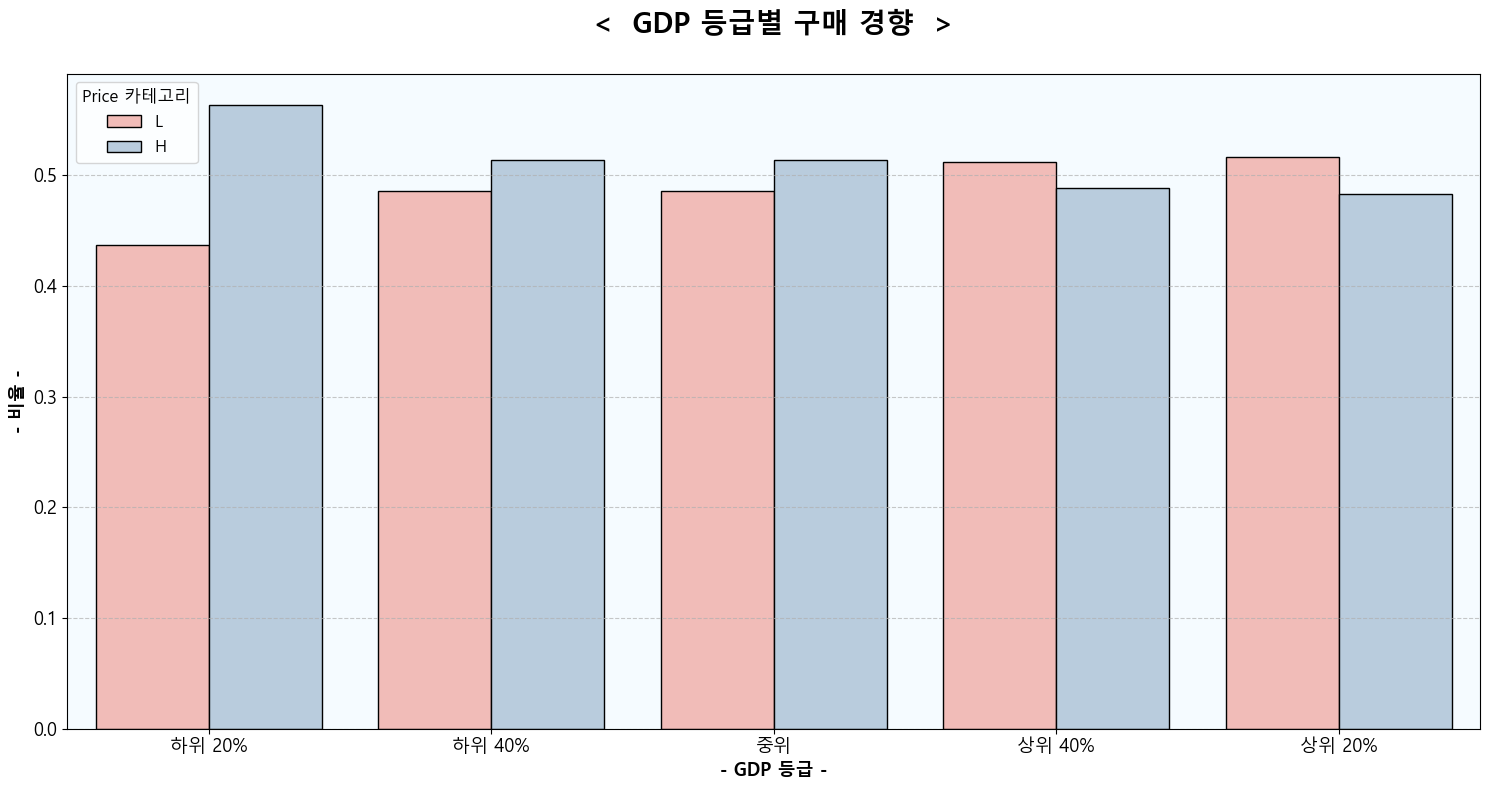

In [246]:
fig, ax = plt.subplots(figsize=(15,8))

_ = sns.barplot(
    data = dfdf,
    x = 'Level', y = 'category_ratio',
    hue = 'price_category',
    edgecolor="black",
    palette='Pastel1',
    ci = None,
    ax = ax
)

_= plt.title('<  GDP 등급별 구매 경향  >\n', fontsize=20, fontweight="bold")
_= plt.xlabel('- GDP 등급 -', fontsize=13, fontweight='bold')
_= plt.ylabel("- 비율 -", fontsize=13, fontweight='bold')
new_labels = ["하위 20%","하위 40%", "중위", "상위 40%", "상위 20%"]
_ = ax.set_xticks(range(len(new_labels)))
_ = ax.set_xticklabels(new_labels, fontsize=13)
_= plt.yticks(fontsize=13)
_= plt.tight_layout()
_=ax.legend(
    title="Price 카테고리",  # 레전드 제목
    title_fontsize=12,  # 제목 크기
    fontsize=12,  # 텍스트 크기
    loc="upper left",  # 그래프 상단 왼쪽에 위치
#     bbox_to_anchor=(1, 1),  # 그래프 밖으로 레전드 이동
    frameon=True,  # 레전드 박스 테두리 표시
)
_= plt.grid(axis="y", linestyle="--", alpha=0.7)
_= ax.set_facecolor('#F5FBFF')

In [153]:
# data = pd.DataFrame({
#     "Category": ["미용 건강", "스포츠 레저", "침대 테이블 목욕", "컴퓨터 악세서리", "장식 가구"],
#     "BOTTOM 5": [187.918, 121.852, 111.11, 155.04, 107.485],
#     "TOP 5": [143.876, 112.986, 91.642, 134.7975, 91.2825]
# })

# data_melted = data.melt(id_vars="Category", 
#                         var_name="GDP", 
#                         value_name="Value")

# fig, ax = plt.subplots(figsize=(15,8))

# _=sns.barplot(
#     data=data_melted,
#     x="Category",
#     y="Value",
#     hue="GDP",
#     palette="Pastel1",
#     edgecolor='black',
#     ax=ax
# )

# _=plt.xlabel(" - 카테고리 - ", fontweight='bold', fontsize=15)
# _=plt.ylabel("")
# _=plt.xticks(fontsize = 13)
# _=plt.yticks(fontsize = 13)

# _=plt.title("<  카테고리별 GDP 상위 및 하위 5개 지역 비교  >\n", fontweight='bold', fontsize=20)
# _=plt.tight_layout()
# _=plt.grid(axis="y", linestyle="--", alpha=0.7)
# _=ax.legend(
#     title="GDP",  # 레전드 제목
#     title_fontsize=15,  # 제목 크기
#     fontsize=15,  # 텍스트 크기
#     loc="upper right",  # 그래프 상단 왼쪽에 위치
# #     bbox_to_anchor=(1, 1),  # 그래프 밖으로 레전드 이동
#     frameon=True,  # 레전드 박스 테두리 표시
# )

# _=ax.set_facecolor('#F5FBFF')

In [154]:
# df1 = merge_df1[['customer_state', 'product_category_name']].value_counts().reset_index()
# df2 = merge_df1.groupby(['customer_state','product_category_name'])['price'].mean().round(2).sort_values(ascending=False).reset_index()
# df3 = pd.merge(df1, df2, on = ['customer_state', 'product_category_name'])
# merge_df2 = pd.merge(df3, cate_price_df)
# print(merge_df2.shape)
# merge_df2.head()

In [155]:
# a = merge_df2.sort_values(by=["customer_state", "count"], ascending=[True, False]).reset_index(drop=True)

In [156]:
# state별로 count수가 높은 순을 내림차순으로 (완)

In [157]:
# gdp 높은 지역들이 지금 싼걸 삼. 
# gdp 상위 5개 지역의 구매 경향 파악.
# gdp 하위 5개 지역의 구매 경향 파악.

In [158]:
#=

In [159]:
# gdp 하위 5개 지역의 구매 경향 파악.

In [160]:
# state_gdp_df = state_gdp_df.loc[state_gdp_df['customer_state']!='SP']
# state_gdp_df = state_gdp_df.loc[state_gdp_df['customer_state']!='RJ']
# state_gdp_df

In [161]:
# state_gdp_df.sort_values(by = 'Pib_2014')[:5]

In [162]:
# state_gdp_df.sort_values(by = 'Pib_2014')[-5:]

In [163]:
# low5_gdp = state_gdp_df.sort_values(by = 'Pib_2014')[:3]['customer_state'].values

# df1 = merge_df2.loc[merge_df2['customer_state'].isin(low5_gdp)]

# df1.sort_values(by=["customer_state", "count"], ascending=[True, False]).set_index('customer_state')

In [164]:
# high5_gdp = state_gdp_df.sort_values(by = 'Pib_2014')[-3:]['customer_state'].values
# df2 = merge_df2.loc[merge_df2['customer_state'].isin(high5_gdp)]

# df2.sort_values(by=["customer_state", "count"], ascending=[True, False])

In [165]:
# merge_df2.loc[merge_df2['customer_state'].isin(low5_gdp)]['count'].sum()

In [166]:
# merge_df2.loc[merge_df2['customer_state'].isin(high5_gdp)]['count'].sum()

## 지역별 GDP와 할부개월의 상관관계

### 지역별 할부개월

In [167]:
df1 = pd.merge(pv_df, payments_df)
df2 = pd.merge(df1, orders_df)
df_halbu = pd.merge(df2, customers_df)

print(df_halbu.shape)
df_halbu.head()

(96479, 16)


,order_id,payment_value,payment_sequential,payment_type,payment_installments,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,1,credit_card,2,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,259.83,1,credit_card,3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,216.87,1,credit_card,5,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,25.78,1,credit_card,2,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,1,credit_card,3,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [168]:
# df_halbu['customer_state'].value_counts()

In [169]:
# df_halbu.groupby('customer_state')['payment_installments'].mean().sort_values().reset_index()

#### 지역별 할부개월 평균 시각화

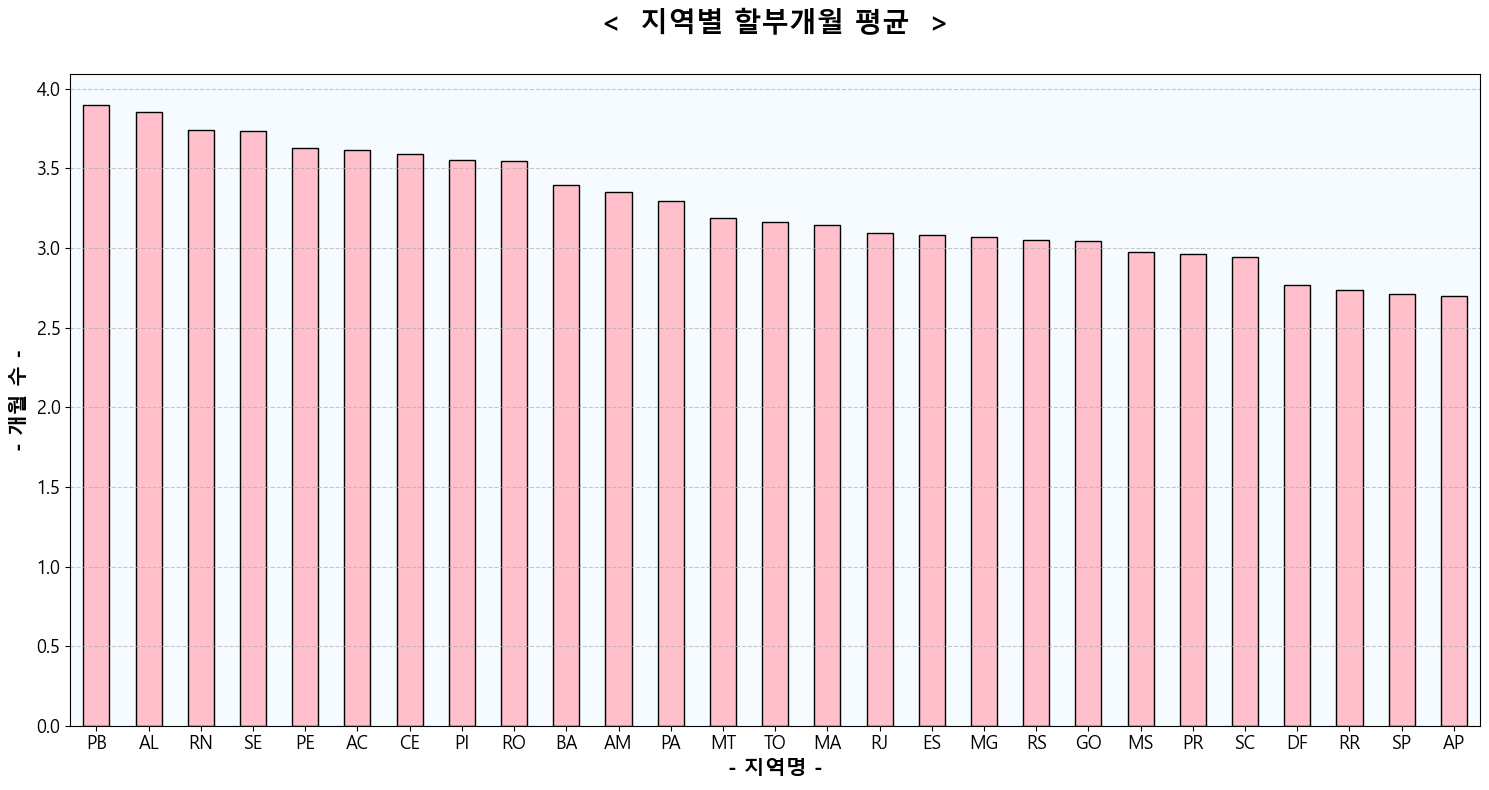

In [170]:
fig, ax = plt.subplots(figsize=(15,8))
_=df_halbu.groupby('customer_state')['payment_installments'].mean().sort_values(ascending=False).plot.bar(
    color = 'pink',
    edgecolor = 'black',
    ax = ax
)
_= plt.title("<  지역별 할부개월 평균  >\n", fontweight='bold', fontsize=20)
_= plt.xlabel('- 지역명 -', fontweight='bold', fontsize=15)
_= plt.ylabel('- 개월 수 -', fontweight='bold', fontsize=15)
_= plt.xticks(rotation=0, fontsize=13)
_= plt.yticks(fontsize=13)
_= plt.tight_layout()
_= plt.grid(axis="y", linestyle="--", alpha=0.7)
_= ax.set_facecolor('#F5FBFF')

In [171]:
df_halbu.groupby(['customer_state', 'payment_installments'])['payment_installments'].count().unstack(fill_value=0)

payment_installments,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,20,21,22,23,24
customer_state,,,,,,,,,,,,,,,,,,,,,
AC,0,28,7,10,7,7,5,3,7,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,134,51,43,34,36,22,8,29,5,...,0,1,0,0,0,0,0,0,0,0
AM,0,65,14,18,8,7,8,2,5,3,...,0,0,0,0,0,0,0,0,0,0
AP,0,29,9,6,10,7,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
BA,1,1304,384,386,290,196,159,53,172,28,...,2,5,0,2,1,2,0,0,0,1
CE,0,475,143,158,114,113,69,33,71,9,...,1,2,0,0,0,0,0,0,0,1
DF,0,1045,286,231,137,88,65,19,90,17,...,0,1,0,0,0,0,0,0,0,1
ES,0,890,245,222,150,110,90,51,86,15,...,0,2,0,0,0,0,0,0,0,0
GO,0,895,233,222,186,94,80,38,81,12,...,1,1,0,0,0,0,0,0,0,1


### df_final1

In [172]:
df1 = df_halbu.groupby('customer_state')['payment_installments'].mean().reset_index()
df_final1 = pd.merge(df1, state_gdp_df)
print(df_final1.shape)
df_final1.head()

(27, 4)


,customer_state,payment_installments,Pib_2014,Level
0,AC,3.615385,12843.351818,Level2
1,AL,3.852868,9600.752929,Level1
2,AM,3.354167,9631.608033,Level1
3,AP,2.696970,15809.433750,Level3
4,BA,3.397273,10584.524515,Level2


### 가설1) 지역별 GDP와 할부개월수는 연관이 있는가?

In [173]:
print(df_final1['payment_installments'].corr(df_final1['Pib_2014']))

-0.5939029356925574


In [174]:
corr_df = df_final1[['payment_installments', 'Pib_2014']].corr()
corr_df

,payment_installments,Pib_2014
payment_installments,1.000000,-0.593903
Pib_2014,-0.593903,1.000000


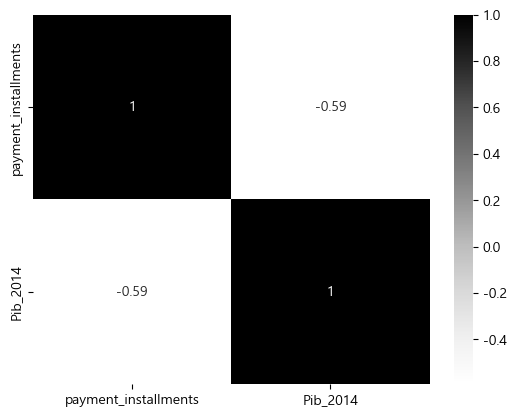

In [175]:
_=sns.heatmap(
    data = corr_df,
    cmap = 'Greys',
    annot = True
)

In [176]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
import numpy as np

# 데이터 준비
source = ColumnDataSource(data=df_final1)

# 회귀선 계산
x = df_final1['payment_installments']
y = df_final1['Pib_2014']
coeffs = np.polyfit(x, y, deg=1)  # 선형 회귀
line = np.poly1d(coeffs)          # 회귀 방정식

# x값 범위에 따라 회귀선 y값 계산
x_fit = np.linspace(x.min(), x.max(), 100)  # 회귀선의 x값
y_fit = line(x_fit)                         # 회귀선의 y값

# 도구툴팁 정의
TOOLTIPS = [
    ("주", "@customer_state"),
    ("할부개월", "@payment_installments"),
    ("GDP", "@Pib_2014"),
]

# 산점도 생성
p = figure(
    title="신용카드 할부개월/GDP 산점도",
    x_axis_label="payment_installments",
    y_axis_label="Pib_2014",
    tooltips=TOOLTIPS,
)

# 산점도 추가
p.scatter(
    "payment_installments",
    "Pib_2014",
    source=source,
    size=12,
    marker="circle",
    color="black",
)

# 회귀선 추가
p.line(x_fit, y_fit, color="red", line_width=2, legend_label="Regression Line")

# 출력 설정
output_file("gdpscatter_with_regression.html")
show(p)

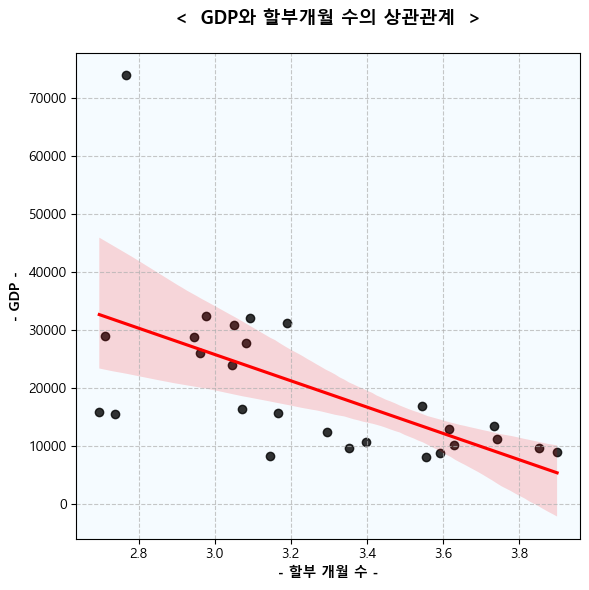

In [177]:
fig, ax = plt.subplots(figsize=(6,6))
_=sns.regplot(
    data=df_final1, 
    x='payment_installments', y='Pib_2014',
    scatter_kws={'color':'black'}, line_kws={'color':'red'},
#     ci = None
)

_= ax.set_facecolor('#F5FBFF') 
_= plt.title('<  GDP와 할부개월 수의 상관관계  >\n', fontsize=13, fontweight="bold")
_= plt.xlabel('- 할부 개월 수 -', fontweight='bold')
_= plt.ylabel('- GDP -', fontweight='bold')
_= plt.tight_layout()
_= plt.grid(linestyle="--", alpha=0.7)

In [178]:
# _= sns.lineplot(
#     data = df_final1,
#     x = 'payment_installments', y = 'Pib_2014',
#     color = 'red'
# )

In [179]:
# _= sns.scatterplot(
#     data = df_final1,
#     x = 'payment_installments', y = 'Pib_2014',
#     color = 'red'
# )

> 지역별 GDP와 할부개월 수는 음의 상관관계를 가진다. 

## 지역별 지불액과 GDP의 상관관계

In [180]:
df1 = pd.merge(orders_df, pv_df)
df = pd.merge(df1, customers_df)
print(df.shape)
df.head()

(99440, 13)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


### 지역별 평균 지불 금액

In [181]:
df1 = df.groupby('customer_state')['payment_value'].mean().reset_index()
df1.head()

,customer_state,payment_value
0,AC,242.970617
1,AL,234.774964
2,AM,188.965743
3,AP,239.158824
4,BA,182.439592


### df_final2

In [182]:
df_final2 = pd.merge(df1, state_gdp_df)
print(df_final2.shape)
df_final2.head()

(27, 4)


,customer_state,payment_value,Pib_2014,Level
0,AC,242.970617,12843.351818,Level2
1,AL,234.774964,9600.752929,Level1
2,AM,188.965743,9631.608033,Level1
3,AP,239.158824,15809.433750,Level3
4,BA,182.439592,10584.524515,Level2


### 가설2 ) GDP가 높은 지역일수록 소비금액의 평균이 높을 것

In [183]:
print(df_final2['payment_value'].corr(df_final2['Pib_2014']))

-0.5478162507241847


In [184]:
corr_df = df_final2[['payment_value', 'Pib_2014']].corr()
corr_df

,payment_value,Pib_2014
payment_value,1.000000,-0.547816
Pib_2014,-0.547816,1.000000


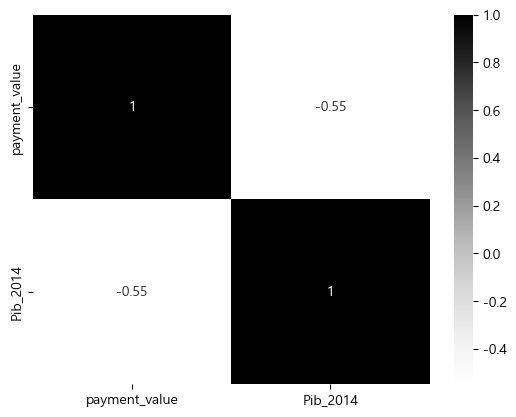

In [185]:
_=sns.heatmap(
    data = corr_df,
    cmap = 'Greys',
    annot = True
)

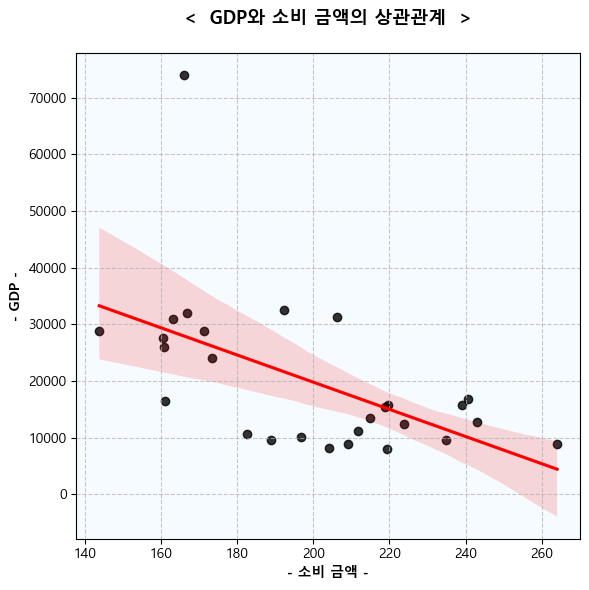

In [186]:
fig, ax = plt.subplots(figsize=(6,6))
_=sns.regplot(
    data=df_final2, 
    x='payment_value', y='Pib_2014',
    scatter_kws={'color':'black'}, line_kws={'color':'red'},
    ax = ax
)

_= ax.set_facecolor('#F5FBFF') 
_= plt.title('<  GDP와 소비 금액의 상관관계  >\n', fontsize=13, fontweight="bold")
_= plt.ylabel('- GDP -', fontweight='bold')
_= plt.xlabel('- 소비 금액 -', fontweight='bold')
_= plt.tight_layout()
_= plt.grid(linestyle="--", alpha=0.7)

In [187]:
# _= sns.lineplot(
#     data = df_final2,
#     x = 'payment_value', y = 'Pib_2014',
#     color = 'red'
# )

# # _=plt.title("< GDP와  >")

In [188]:
# _= sns.scatterplot(
#     data = df_final2,
#     x = 'payment_value', y = 'Pib_2014',
#     color = 'red'
# )

- GDP가 높은 지역일수록 소비 금액이 낮은 편에 속한다.